In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from datetime import timedelta

In [3]:
employee_data=pd.read_csv('Employee_data.csv')

In [4]:
#convert date and time value to pandas version, subtract to determine time at company
employee_data['join_date']=pd.to_datetime(employee_data['join_date'])
employee_data['quit_date']=pd.to_datetime(employee_data['quit_date'])
employee_data['tenure_length']=employee_data['quit_date']-employee_data['join_date']

In [5]:
employee_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,tenure_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


In [6]:
#create a new data frame of when people join and leave companies over the time of the data
company_headcount=pd.DataFrame()
dates=pd.date_range('2011/01/24', '2015/12/13')
dates_df=pd.DataFrame({'day': dates, 'key': np.full(len(dates),1)})

In [7]:
#sort by the different companies
companies=sorted(employee_data['company_id'].unique())
companies_df=pd.DataFrame({'company_id': companies, 'key': np.full(len(companies), 1)})

In [8]:
#merge the companies and dates of joining
headcount=pd.merge(dates_df, companies_df)
headcount.drop('key', axis=1, inplace=True)

In [9]:
#figure the number of people leaving and joining
num_joined=employee_data.groupby(['join_date', 'company_id']).apply(lambda x: len(x)).reset_index(name='num_joined')
num_quit=employee_data.groupby(['quit_date', 'company_id']).apply(lambda x: len(x)).reset_index(name='num_quit')

In [10]:
#merge the dataframes with join and quit dates
headcount = pd.merge(headcount, num_joined, how='left', left_on=['day', 'company_id'], right_on=['join_date', 'company_id'])
headcount = pd.merge(headcount, num_quit, how='left', left_on=['day', 'company_id'], right_on=['quit_date', 'company_id'])

In [11]:
#replace days in which no one quit or joined at certain companies by zero rather than NaN
headcount['num_joined']=headcount['num_joined'].fillna(0)
headcount['num_quit']=headcount['num_quit'].fillna(0)

In [12]:
#keep cumulative track of the people who have joined or left a company
headcount['join_cumsum']=headcount.groupby('company_id')['num_joined'].cumsum()
headcount['quit_cumsum']=headcount.groupby('company_id')['num_quit'].cumsum()

In [13]:
#keep track of the total change in employees
headcount['total_joined']=headcount['join_cumsum']-headcount['quit_cumsum']

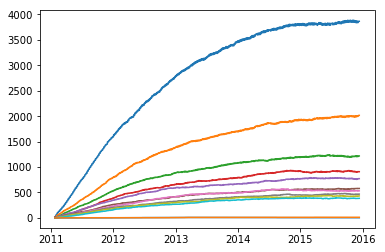

In [14]:
#show the plot of the total number of people joining the different companies
for name, index in headcount.groupby('company_id'):
    plt.plot(dates, index['total_joined'])
plt.show()

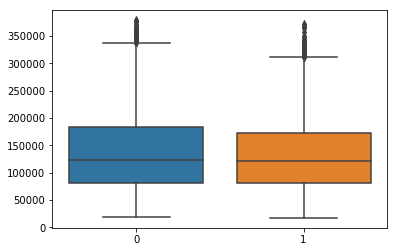

In [16]:
#compare people who leave after a short term or a long term (more or less than a year) in terms of their salary
quitters=employee_data[employee_data['tenure_length'].dt.days<365]
lifers=employee_data[employee_data['tenure_length'].dt.days>365]
sns.boxplot(data=(lifers['salary'].values, quitters['salary'].values))
plt.show()

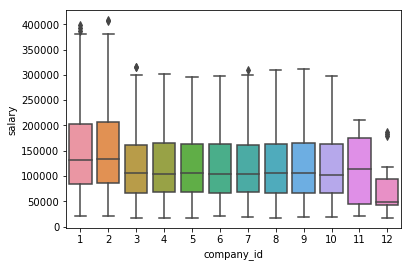

In [17]:
#compare salaries across different companies
sns.boxplot(x=employee_data['company_id'], y=employee_data['salary'])
plt.show()

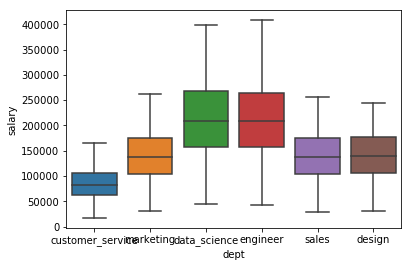

In [18]:
#compare salaries across different departments
sns.boxplot(x=employee_data['dept'], y=employee_data['salary'])
plt.show()

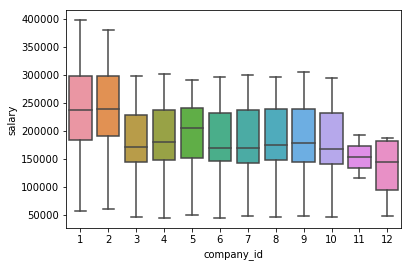

In [19]:
#which company pays data scientists the best?
data_scientists=employee_data[employee_data['dept']=='data_science']
sns.boxplot(x=data_scientists['company_id'], y=data_scientists['salary'])
plt.show()

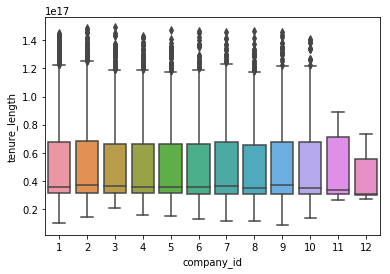

In [20]:
#which companies retain employees the best?
sns.boxplot(x=employee_data['company_id'], y=employee_data['tenure_length'])
plt.show()